# Fashion MNIST Dataset

Let's take a look at a scenario where we can recognize different items of clothing, trained from a dataset containing 10 different types.
The Fashion MNIST data is available directly in the keras datasets API.

**The data set are about 70,000 image 60,000 of them as training and 10,000 as testing**

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
mnist_data = tf.keras.datasets.fashion_mnist

### The data set is two sets each of them are two lists of training and labeling data of images.

In [3]:
(X_train, y_train), (X_test, y_test) = mnist_data.load_data()

In [4]:
print("Our Training data are: ", X_train.shape)
print("Our Testing data are: ", X_test.shape)
print("Our labels of Training data are: ", y_train.shape)
print("Our labels of Testing data are: ", y_test.shape)

Our Training data are:  (60000, 28, 28)
Our Testing data are:  (10000, 28, 28)
Our labels of Training data are:  (60000,)
Our labels of Testing data are:  (10000,)


### visualize an image of your data with its features and label

Actually its good point to notice the label is number instead of the clothes name, and this was a great because it's avoid bias towards specific language.

The features of the image 5 are
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   0   0   0
    0   0   0   0 164  50   0   7   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0   1   0   0   1   1   0   0
    5   0  45 217 255 176   0   6   0   0]
 [  0   0   0   0   0   0   0   0   0   1   1   0   3   3   5   9   0   2
    0  62 236 231 215  27   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   29 244 231 234  74   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2   0   0   0  23  41  59 111 134
  138 226 202 217  22   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   5   0  35 179 195 182 225 198 241
  177 199 205 210  26   0   1   0   0   3]
 [  0   0   0   0   0   0   0  

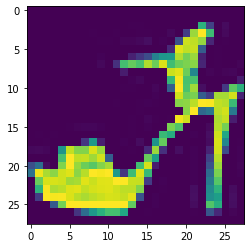

In [5]:
print("The features of the image 5 are\n",X_train[9])
print("The label of the image 5 are: ",y_train[9])
plt.imshow(X_train[9])

## Features normalization

As we saw the values of each pixel in the image is between 0 and 255 which our scale of brightness.
but it's always useful for our model to learn within specific range of values and its help a lot for computational operations that happen in the Neural Network, and helpful for systems doing Math operations fast.

In [6]:
X_train = X_train / 255.0
X_test  = X_test / 255.0

### Notes !!

**Sequential:** That defines some of layers in ordering.

**Dense:** Adds a layer of neurons, and for each layer as you see below should give it the activation function that should use, and its always using soft max for output layer and for hidden layer we have some of functions like relu or tanch or others.

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer of our network which will be output layer.

**Softmax** takes a set of values, then take the biggest one, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], take biggest value and set to 1, and turns others to 0 as this: [0,0,0,0,1,0,0,0,0]

In [7]:
class myCallback(tf.keras.callbacks.Callback):
    '''
    it's useful to use call back function that terminate your algorithm when its reach the accuracy you need.
    it's save a lot of time.
    '''
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.91):
            print("\nReached 91% accuracy so cancelling training!")
            self.model.stop_training = True


In [8]:
def NN_model(X, Y, iterations, hidden_layer_nerons):
    '''
    A simple shallow Neural Network that contain just 3 layers.
    input layer instead of each image as 28*28 this will Flatten() to be 784.
    one hidden layer with 512 neurons and use relu as activation function.
    output layer with 10 predicted values in our data.
    '''
    callbacks = myCallback() # instance from the class
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(hidden_layer_nerons, activation = tf.nn.relu))
    model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))
# compile the model with Adam optimizer Algorithm
    model.compile(optimizer = tf.optimizers.Adam(), loss = 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(X, Y, epochs=iterations, callbacks=[callbacks])
    return model

In [9]:
model = NN_model(X_train, y_train, 25, 512)

Train on 60000 samples
Epoch 1/25
60000/60000 [==============================] - 7s 113us/sample - loss: 0.4715 - accuracy: 0.8315
Epoch 2/25
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3579 - accuracy: 0.8687
Epoch 3/25
60000/60000 [==============================] - 6s 96us/sample - loss: 0.3223 - accuracy: 0.8798
Epoch 4/25
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2987 - accuracy: 0.8889
Epoch 5/25
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2803 - accuracy: 0.8957
Epoch 6/25
60000/60000 [==============================] - 7s 109us/sample - loss: 0.2654 - accuracy: 0.9008
Epoch 7/25
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2523 - accuracy: 0.9054
Epoch 8/25
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2423 - accuracy: 0.9097
Epoch 9/25
59968/60000 [============================>.] - ETA: 0s - loss: 0.2315 - accuracy: 0.9126
Reached 91% accur

## You can see its stop at epoc 9 because the accuracy being over 91

### Notes !!
Accuracy: 0.9125 that means:

**it figured out a pattern match between the image and the labels that worked 91%**

In [10]:
## Test the model with unseen data
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 83us/sample - loss: 0.3576 - accuracy: 0.8786


[0.3575859471678734, 0.8786]

### Notes !!

Accuracy: 0.8781 a bit away of training data and that should work okay, because we do not need the model to fit the data very well to avoid overfitting.

Cost_function: .31 on testing and .22 on training.

In [11]:
predict = model.predict(X_test)

## Output Layer
you will see below 10 values each of them represent probability of one label of our 10 labels we try to predict, then we should take the largest probability.

In [12]:
predict[0]

array([2.9592160e-08, 5.8025507e-10, 3.3091605e-09, 1.9538910e-11,
       5.7241767e-09, 9.5219439e-04, 2.3474785e-08, 4.1392080e-02,
       1.1051574e-06, 9.5765448e-01], dtype=float32)

In [13]:
max(predict[0])

0.9576545

In [14]:
y_test[0]

9

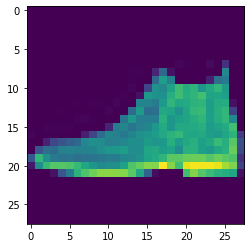

In [15]:
plt.imshow(X_test[0])